[출처](https://www.datamanim.com/dataset/ADPpb/00/20.html)  

# 머신러닝
## 1. 데이터 확인 및 전처리

- 날씨 온도 예측, 종속변수 :actual(최고온도)
- 데이터 출처 : https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
- 데이터 경로 : /kaggle/input/adp-kr-p2/problem1.csv
- temp_1 : 전날 최고온도
- temp_2 : 전전날 최고온도
- friend : 친구의 예측온도

### 1.1 데이터 확인 및 전처리

- 데이터 EDA 수행

- 결측치를 확인하고 처리 방안에 대해 논의하라

- 데이터 분할 방법 설명

- 최종 데이터셋이 적절함을 주장하라

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/20/problem1.csv')
display(df.head())
display(df.shape)
display(df.describe())
display(df.info())

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


(348, 12)

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


None

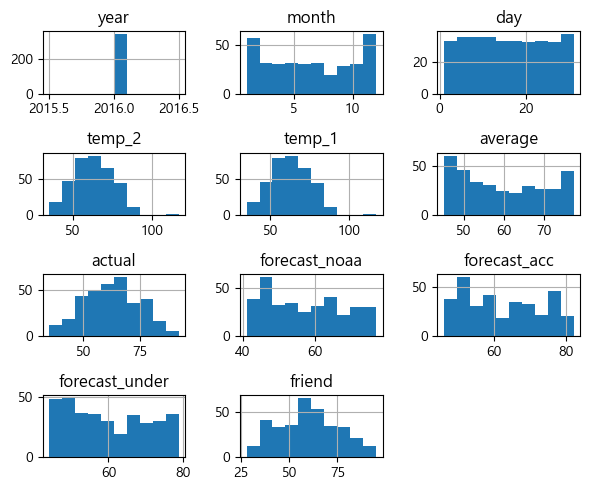

In [9]:
df.hist(figsize=(6,5))
plt.tight_layout()
plt.show()

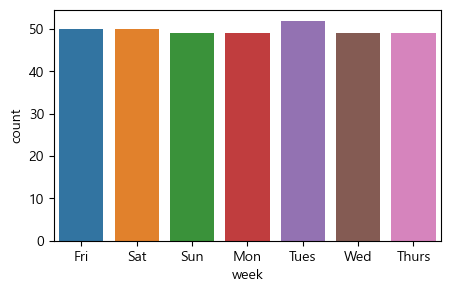

In [23]:
plt.figure(figsize=(5,3))
sns.countplot(df.week);

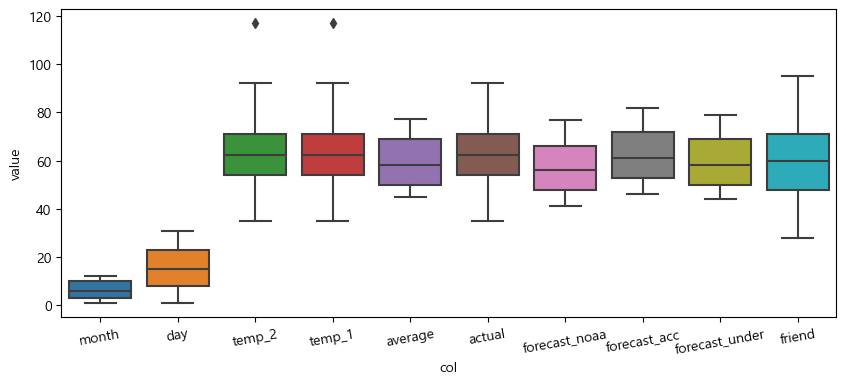

In [20]:
x = df.drop(['week', 'year'], axis=1)
df_v1 = pd.melt(x, var_name='col', value_name='value')
plt.figure(figsize=(10,4))
sns.boxplot(x = 'col', y='value', data=df_v1)
plt.xticks(rotation=10)
plt.show()

In [22]:
df.year.value_counts()

2016    348
Name: year, dtype: int64

In [24]:
# 결측치 확인
df.isna().sum()

year              0
month             0
day               0
week              0
temp_2            0
temp_1            0
average           0
actual            0
forecast_noaa     0
forecast_acc      0
forecast_under    0
friend            0
dtype: int64

In [25]:
# 중복행 개수
df.duplicated().sum()

0

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.000000,-0.000412,0.047651,0.032664,0.120806,0.004529,0.131141,0.127436,0.119786,0.048145
day,NaN,-0.000412,1.000000,-0.046194,-0.000691,-0.021136,-0.021675,-0.021393,-0.030605,-0.013727,0.024592
temp_2,NaN,0.047651,-0.046194,1.000000,0.857800,0.821560,0.805835,0.813134,0.817374,0.819576,0.583758
temp_1,NaN,0.032664,-0.000691,0.857800,1.000000,0.819328,0.877880,0.810672,0.815162,0.815943,0.541282
average,NaN,0.120806,-0.021136,0.821560,0.819328,1.000000,0.848365,0.990340,0.990705,0.994373,0.689278
actual,NaN,0.004529,-0.021675,0.805835,0.877880,0.848365,1.000000,0.838639,0.842135,0.838946,0.569145
forecast_noaa,NaN,0.131141,-0.021393,0.813134,0.810672,0.990340,0.838639,1.000000,0.979863,0.985670,0.669221
forecast_acc,NaN,0.127436,-0.030605,0.817374,0.815162,0.990705,0.842135,0.979863,1.000000,0.983910,0.696054
forecast_under,NaN,0.119786,-0.013727,0.819576,0.815943,0.994373,0.838946,0.985670,0.983910,1.000000,0.691177


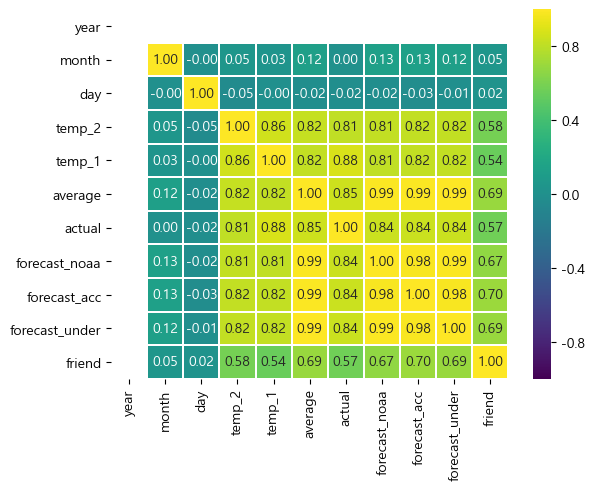

In [71]:
df_corr = df.corr()
display(df_corr)
sns.heatmap(df_corr, annot=True, fmt='.2f', vmax=1, vmin=-1, linewidth=.3, cmap='viridis');

In [47]:
corr_unstack = df_corr.abs().unstack()
df_cor = pd.DataFrame(corr_unstack[corr_unstack < 1].sort_values(ascending=False),
                      columns=['corr'])[:20]
display(df_cor.style.background_gradient(cmap='viridis'))
top_corr_cols = df_cor.reset_index()['level_0'].unique()
print('top_corr_cols:', top_corr_cols)

,,corr
average,forecast_under,0.994373
forecast_under,average,0.994373
average,forecast_acc,0.990705
forecast_acc,average,0.990705
forecast_noaa,average,0.990340
average,forecast_noaa,0.990340
forecast_under,forecast_noaa,0.985670
forecast_noaa,forecast_under,0.985670
forecast_acc,forecast_under,0.983910
forecast_under,forecast_acc,0.983910


top_corr_cols: ['average' 'forecast_under' 'forecast_acc' 'forecast_noaa' 'temp_1'
 'actual' 'temp_2']


[해석]
1. 결측치 존재 여부
    - 전체 데이터에서 결측치는 존재하지 않았다.
1. 데이터 타입
    - week 컬럼은 범주형 변수이며, 종속변수인 actual 컬럼은 int 형이다. 나머지 독립변수들은 int, float으로 구성되어 있다.
1. 종속변수와 독립변수의 상관관계 설명
    - 종속변수와 가장 상관이 높은 독립변수는 forecast_acc가 상관계수 0.7로 나타났으며, 그 아래로 forecast_under, forecast_noaa, average 등 상관계수 0.6 이상으로 확인하였다.
    - month, day를 제외하고는 상대적으로 높은 양의 상관관계를 갖는다.
1. 독립변수들 간 상관성 확인
    - 독립변수들 간에 강한 양의 상관관계가 다수 나타나서 다중공선성 문제를 의심할 수 있다.
    - 상관성이 높은 상위 변수는 'average' 'forecast_under' 'forecast_acc' 'forecast_noaa' 'temp_1', 'actual' 'temp_2' 등으로 확인하였다.
    - 이 문제를 해결하기 위해 다중공선성 문제를 해결할 수 있는 알고리즘 모델을 사용하거나 차원축소 기법을 이용할 수 있을 것이다. 또는 상관성이 높은 두 변수를 대신할 수 있는 새로운 파생변수를 만드는 것도 방법이 될 수 있다.
1. 데이터 분할 방법
    - 랜덤 분할: train, test 데이터세트를 나누어 학습된 데이터를 검증할 수 있으며, 분할 시에 무작위로 사용자가 지정하여 비율로 분할한다. 전체 분석 데이터 중 머신러닝 모델을 학습시키기 위한 학습용 데이터와 테스트용 데이터를 나누어 적용시키는 이유는 모델 결과가 다른 데이터에도 적용 가능한지, 일반화가 가능한지를 검증하기 위함이다.
    - 층화 추출 기법: 종속변수가 번주형 변수인 경우에는 종속변수의 클래스 비율을 기준으로 학습용 데이터와 테스트용 데이터의 비율이 동일하게 분할한다. 즉 클래스의 편향을 막을 수 있다.
    - 해당 데이터의 종속변수는 연속형이므로, 회귀분석을 사용한다. 따라서 층화 추출 기법이 아닌 랜덤 샘플링 기법을 통한 분할을 사용한다.
1. 이상치 확인
    - temp_1, temp_2 컬럼에서 각각 하나의 이상치가 발견되었다. 본 분석에서는 이상치라고 판정된 값을 대체하거나 삭제하지 않고 이용한다. 실제 업무에서는 이상치 처리 방안을 전문과들과 논의하여야 할 것이다.
1. 최종 데이터세트의 적절성 판단
    - 데이터에 결측치가 없으며 year, month, day, friend 컬럼은 상대적으로 변수 간 상관성이 낮으므로 삭제한다(데이터 분할 전에 삭제하였음).
    - 다만 독립변수들 간에 다중공선성 문제가 의심되므로 이를 해결할 수 있는 회귀모델을 활용할 것을 권장한다.
    - week 변수는 범주형 변수이므로 더미 변수로 변환한 후에 모델에 적용해야 할 것이다.

### 1.2 Random Forest 모델 적합 및 검증

- Random Forest 학습 및 예측 결과 해석

- 예측 결과 검정 해석, 중요변수 도출

- 변수 중요성 분석 및 그래프 출력

r2 score: 0.78721
RMSE: 4.96329
학습 시간:  0.253574 sec


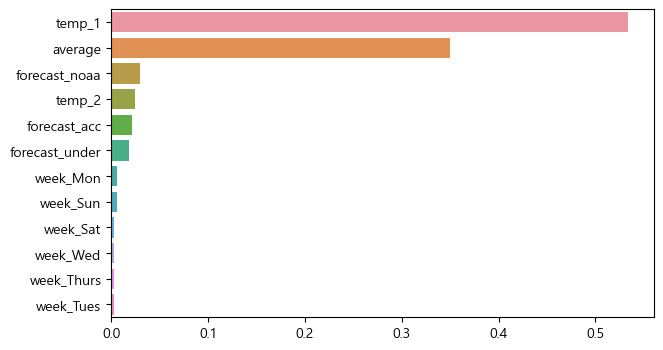

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import time

# 범주형 변수를 더비 변수로 변환
df1 = pd.get_dummies(df, 'week', drop_first=True)

# 데이터 분할
X = df1.drop(['actual', 'year', 'month', 'day', 'friend'], axis=1)
y = df1.actual
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 2023)

# 모델 학습
rfr_rg = RandomForestRegressor(n_estimators=100)
start = time.time()
rfr_rg.fit(X_train, y_train)
end = time.time()

# 예측값 도출
rfr_pred = rfr_rg.predict(X_test)

# 모델 평가
rfr_r2_score = round(r2_score(rfr_pred, y_test), 5)
print('r2 score:', rfr_r2_score)
rfr_rmse = round(np.sqrt(mean_squared_error(rfr_pred, y_test)),5)
print('RMSE:', rfr_rmse)
print('학습 시간: ', round(end-start, 6), 'sec')

# 변수 중요도
rfr_rg_values = rfr_rg.feature_importances_
rfr_importances = pd.Series(rfr_rg_values, index=X_train.columns)
rfr_df = rfr_importances.sort_values(ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(x=rfr_df, y=rfr_df.index);

### 1.3 SVM(Support Vector Machine) 모델 적합 및 검증

- svm 학습 및 예측 결과 해석

- 예측 결과 검정 해석, 중요변수 도출

- 변수 중요성 분석 및 그래프 출력

In [84]:
from sklearn.svm import SVR

# 모델 학습
svr = SVR()
start = time.time()
svr.fit(X_train, y_train)
end = time.time()

# 예측값 도출
svr_pred = svr.predict(X_test)

# 모델 평가
svr_r2_score = round(r2_score(svr_pred, y_test), 5)
print('r2 score:', svr_r2_score)
svr_rmse = round(np.sqrt(mean_squared_error(svr_pred, y_test)), 5)
print('RMSE:', svr_rmse)
print('학습 시간: ', round(end-start, 6), 'sec')

# 변수 중요도
print('※SVM 모델은 변수 중요도를 시각화할 수 있는 방법이 없다.')

r2 score: 0.51317
RMSE: 5.36353
학습 시간:  0.012008 sec
※SVM 모델은 변수 중요도를 시각화할 수 있는 방법이 없다.


### 1.4 모델 비교 및 향후 개선 방향 도출

#### Random Forest, SVM 모델의 결과 비교 후 최종 모델 선택
#### 두 모델의 장단점 분석, 추후 운영 관점에서 어떤 모델을 선택할 것인가?
#### 모델링 관련 추후 개선 방향 제시
- r2_score와 RMSE를 성능 평가 지표로 사용했는데, 랜덤포레스트가 SVM보다 성능이 더 좋았지만 학습 소요 시간은 SVM이 더 빠른 것으로 확인하였다.
- SVM 모델의 장점은 오류 데이터에 대한 영향이 거의 없어서 과적합되는 경우가 거의 없다. 즉, 오류가 많은 데이터인 경우에는 SVM 모델이 강점이다. 그리고 분류, 회귀 문제 모두 사용될 수 있다. 하지만 학습 속도가 느리고, 해석이 어렵고 모델이 복잡하다는 단점이 있다.
- 랜덤포레스트는 앙상블 모델로 예측 변동성이 줄어들며 과적합을 방지할 수 있다. 또한 이상치와 결측치에 강하며 변수 중요도를 시각화할 수 있고, SVM과 마찬가지로 분류와 회귀문제에 모두 사용할 수 있다. 하지만 하이퍼 파라미터가 너무 많고, 그로 인해 튜닝을 위한 시간이 많이 소요될 수 있다.
- 본 분석에서는 r2_score 측면에서 랜덤포레스트의 성능이 더 높고, 변수 중요도를 확인할 수 있기에 랜덤포레스트를 최종 모델로 선택하였다.
- 추후 랜덤포레스트 모델을 개선할 수 있는 방향은 하이퍼 파라미터 튜닝을 통해 모델의 신뢰성과 일반화 가능성을 높일 수 있을 것이다. 또한 본 분석에서는 year, month, day, friends 컬럼을 삭제하였는데, 이들을 이용한 파생 변수를 생성하면 본 분석의 문제점인 데이터 소실 문제를 보완할 수 있을 것이다.

In [86]:
pd.DataFrame({
    'r2_score':[rfr_r2_score, svr_r2_score],
    'rmse': [rfr_rmse, svr_rmse],
    'learning time(s)': [0.253574, 0.012008]
}, index = ['RandomForest', 'SVM'])

,r2_score,rmse,learning time(s)
RandomForest,0.78721,4.96329,0.253574
SVM,0.51317,5.36353,0.012008


## 2. 5분간격의 가구별 전력 사용량의 데이터
- 데이터 출처 : 자체생성
- 데이터 경로 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p2/problem2.csv

In [3]:
ttt= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/20/problem2.csv')
ttt.head()

,houseCode,date,power consumption
0,house_01,2050-01-14 21:00:00,57.559878
1,house_26,2050-01-02 19:10:00,59.726880
2,house_25,2050-01-13 07:20:00,6.558823
3,house_20,2050-01-26 04:55:00,58.514589
4,house_09,2050-01-18 22:50:00,5.717009


### 2.1 데이터 전처리
- 각 가구의 15분간격의 전력량의 합을 구하고 해당데이터를 바탕으로 총 5개의 군집으로 군집화를 진행한 후 아래의 그림과 같은 형태로 출력하라. 군집화를 위한 데이터 구성의 이유를 설명하라. (군집 방식에 따라 Cluster컬럼의 값은 달라질수 있음)

In [4]:
ttt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401760 entries, 0 to 401759
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   houseCode          401760 non-null  object 
 1   date               401760 non-null  object 
 2   power consumption  401760 non-null  float64
dtypes: float64(1), object(2)
memory usage: 9.2+ MB


In [16]:
tt = ttt.sort_values(['houseCode', 'date']).reset_index(drop=True)
tt['date'] = pd.to_datetime(tt['date'])
tg = tt.groupby(['houseCode']).resample('15min', on='date')['power consumption'].sum().reset_index()
tg = tg.rename(columns= {'power consumption':'power consumption sum'})
tgg = tg.copy()

tgg['c'] = tgg['houseCode'].str[-2:].astype('int')
tgg['d'] = tgg['date'].dt.hour
tgg['e'] = tgg['date'].dt.year

from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
km.fit(tgg.iloc[:, 2:].values)
tg['cluster'] = km.labels_
tg

,houseCode,date,power consumption sum,cluster
0,house_00,2050-01-01 00:00:00,10490.383537,4
1,house_00,2050-01-01 00:15:00,11319.811623,2
2,house_00,2050-01-01 00:30:00,9988.022661,0
3,house_00,2050-01-01 00:45:00,11592.903364,2
4,house_00,2050-01-01 01:00:00,10162.980551,0
...,...,...,...,...
3013,house_44,2050-01-31 22:45:00,10959.637703,4
3014,house_44,2050-01-31 23:00:00,11316.692542,2
3015,house_44,2050-01-31 23:15:00,11386.455393,2
3016,house_44,2050-01-31 23:30:00,11349.458308,2


### 2-2 히트맵 시각화
- 2-1의 데이터를 바탕으로 각 군집의 요일, 15분간격별 전력사용량의 합을 구한 후 아래와 같이 시각화 하여라
- (수치는 동일하지 않을 수 있음 2-1의 데이터가 정확하게 아래와 같은 이미지로 변환 됐는지 주로 확인)

In [20]:
tg['day'] = tg.date.dt.day_name()
tg['min'] = tg.date.dt.strftime('%H:%M')

pv = tg.groupby(['cluster','day','min'], as_index=False).sum()
pv.head(4)

,cluster,day,min,power consumption sum
0,0,Friday,00:00,19738.190289
1,0,Friday,00:15,20095.411020
2,0,Friday,00:45,9643.084516
3,0,Friday,01:00,10285.158266


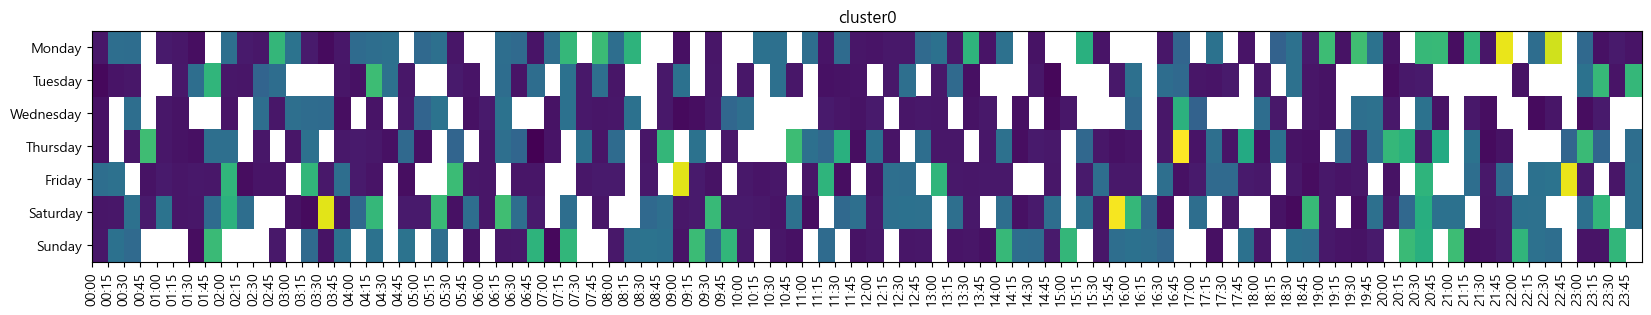

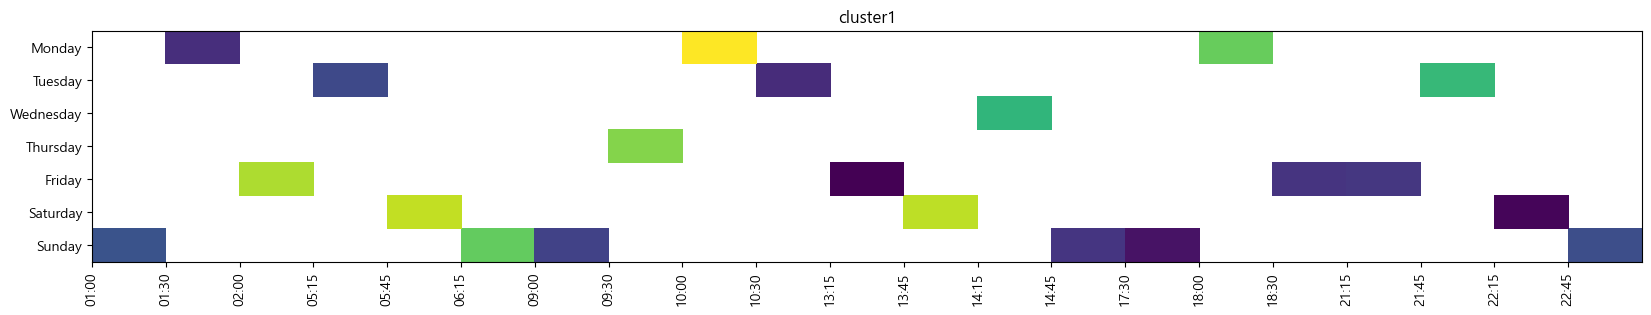

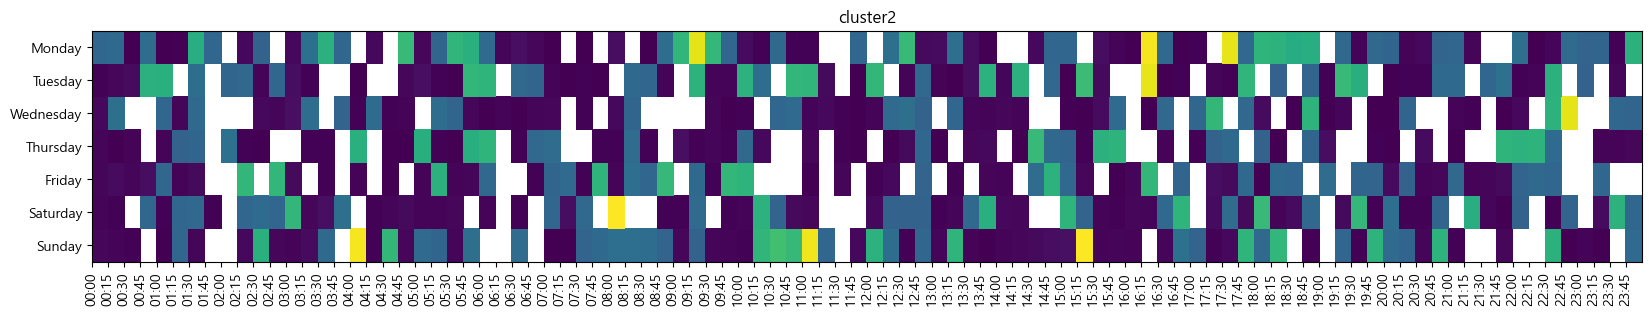

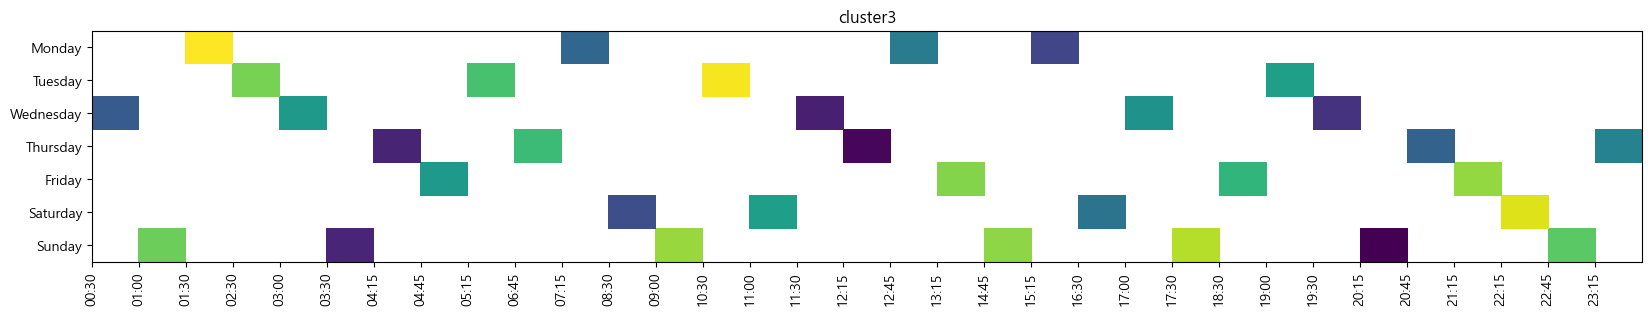

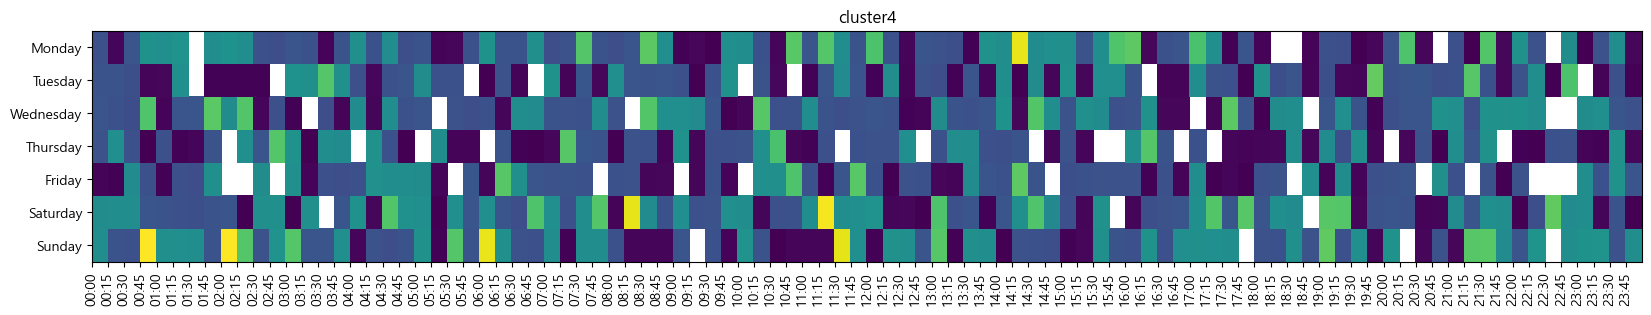

In [22]:
for v in range(5):
    plt.figure(figsize=(20,3))
    target = pv.loc[pv.cluster==v]
    pvt = target.pivot(index='day',columns='min',values='power consumption sum').reindex(['Sunday','Saturday','Friday','Thursday','Wednesday','Tuesday','Monday'])
    plt.pcolor(pvt)
    plt.title('cluster'+str(v))
    plt.xticks(range(len(pvt.columns)),pvt.columns,rotation=90)
    plt.yticks(np.arange(len(pvt.index))+0.5,pvt.index)

## 3. 태양광 데이터
- 데이터 출처 : https://www.kaggle.com/cheedcheed/california-renewable-production-20102018
- 데이터 경로 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p2/problem3.csv
- 예측 변수 :SOLAR PV

### 3.1 데이터셋 분할 및 결과 검증

- 데이터셋 7:3 분할

- 데이터 전처리 및 예측 모델 생성

- 모델 성능 검증 : RMSE, R제곱, 정확도(아래 방식으로 연산)로 구하여라

- 정확도의 경우 실제값>예측값인 경우 (1-예측값/실제값), 실제값<예측값인 경우 (1- 실제값/예측값)으로 하고 이것들을 평균낸 후 1에서 뺀값으로 한다.

- 분수식의 분모가 0인 경우의 정확도는 0.5로 취급한다.

- 최종 결과 제출 : 소수점 3째자리 반올림

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/20/problem3.csv')
df.head()

,TIMESTAMP,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,SOLAR,SOLAR PV,SOLAR THERMAL,WIND TOTAL
0,2012-11-26 00:00:00,208.0,354.0,926.0,1.0,208.0,NaN,0.0,0.0,57.0
1,2012-11-26 01:00:00,207.0,354.0,927.0,2.0,207.0,NaN,0.0,0.0,76.0
2,2012-11-26 02:00:00,208.0,353.0,927.0,3.0,208.0,NaN,0.0,0.0,100.0
3,2012-11-26 03:00:00,208.0,350.0,927.0,4.0,209.0,NaN,0.0,0.0,111.0
4,2012-11-26 04:00:00,209.0,352.0,927.0,5.0,209.0,NaN,0.0,0.0,131.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44904 entries, 0 to 44903
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TIMESTAMP      44904 non-null  object 
 1   BIOGAS         44904 non-null  float64
 2   BIOMASS        44904 non-null  float64
 3   GEOTHERMAL     44904 non-null  float64
 4   Hour           44904 non-null  float64
 5   SMALL HYDRO    44904 non-null  float64
 6   SOLAR          0 non-null      float64
 7   SOLAR PV       44904 non-null  float64
 8   SOLAR THERMAL  44904 non-null  float64
 9   WIND TOTAL     44904 non-null  float64
dtypes: float64(9), object(1)
memory usage: 3.4+ MB


In [41]:
df.describe()

,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,SOLAR,SOLAR PV,SOLAR THERMAL,WIND TOTAL
count,44904.000000,44904.000000,44904.000000,44904.000000,44904.000000,0.0,44904.000000,44904.000000,44904.000000
mean,185.700405,283.616604,945.298882,12.500000,284.281200,NaN,1647.195706,117.254521,1478.654262
std,19.947924,59.600559,89.507178,6.922264,132.114683,NaN,2390.975782,188.736880,1135.239178
min,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000
25%,172.000000,237.000000,883.000000,6.750000,176.000000,NaN,0.000000,0.000000,413.750000
50%,187.000000,283.000000,928.000000,12.500000,272.000000,NaN,3.000000,0.000000,1301.000000
75%,199.000000,332.000000,1011.000000,18.250000,374.000000,NaN,2955.000000,213.000000,2374.000000
max,248.000000,423.000000,1230.000000,24.000000,678.000000,NaN,9373.000000,725.000000,4914.000000


In [106]:
# SOLAR 컬럼 제거
df1 = df.drop('SOLAR', axis=1)

# # df1 컬럼의 상자그림(이상치 확인)
# df1.boxplot(figsize=(12, 3));

In [107]:
# 데이터 분할
X = df1.drop(['SOLAR PV', 'TIMESTAMP'], axis=1)
y = df1['SOLAR PV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=2)

# 모델 학습 및 예측값 도출
rfr = RandomForestRegressor(random_state=100)
rfr.fit(X_train, y_train)
pred = rfr.predict(X_test)

# 정확도 계산
# 실제값>예측값인 경우 (1-예측값/실제값), 실제값<예측값인 경우 (1- 실제값/예측값)으로 하고 이것들을 평균낸 후 1에서 뺀값으로 한다.
# 분수식의 분모가 0인 경우의 정확도는 0.5로 취급한다.
def acc(y_test, pred):
    if pred == 0: 
        return 0.5
    if y_test == 0:
        return 0.5
    
    if y_test > pred:
        return 1 - (pred/y_test)
    else:
        return 1 - (y_test/pred)

acc_lst = []
for i, value in enumerate(y_test):
    acc_lst.append(acc(value, pred[i]))

# 모델 성능 계산
print('r2_score:', round(r2_score(pred, y_test), 2))
print('RMSE:', round(mean_squared_error(pred, y_test)**0.5, 2))
print('정확도: ', round(1- np.mean(acc_lst), 2))

r2_score: 0.96
RMSE: 469.65
정확도:  0.66
